# Grafiken

## Inhalt
* [Allgemeine Informationen](#Allgemeine-Informationen)
* [Plot von Flächen im 3-dim. Raum](#Plot-von-Fl%C3%A4chen-im-3-dim.-Raum)
* [Parametrische Darstellung von Funktionen](#Parametrische-Darstellung-von-Funktionen)
* [Plot von impliziten Funktionen](#Plot-von-impliziten-Funktionen)
* [Konturen](#Konturen)
* [Animationen](#Animationen)



### Allgemeine Informationen  

* Grafiken werden im Notebook integriert.
* wir benutzen native Grafiken für 2D und plotly für 3D-Grafiken (*nicht* die standard 3D- Grafiken von Sage)
* plotly Grafiken können interaktiv bearbeitet werden.
* Grafikbefehle erzeugen <em>grafische Objekte</em> wie Geraden, Funktionsgraphen oder Kurven.
* Darstellung: 

``` python
<grafikobjekt>.show(<optionen>) 
```

bzw. mit plotly

```python
ishow(<objekt>,  <optionen>)
```
* Speichern:
    * 2D: 
    ``` python
    <grafikobjekt>.save('filename.extension') 
    ```
    speichert im Format <extension>
    * 3D (plotly): "save" -button oben rechts
* es existieren eine Reihe spezialisierter Plot-Funktionen (Pfeile, Kugel, etc.)

  
### Skalare Funktionen

$f:\mathbb{R}^n \ \rightarrow \mathbb{R},\, n=2,3$

#### 2D (Kurven)

``` python
plot(<f2>,<(x,a,b)>,<optionen>,...)
```

<em>plot.options</em> gibt einem die Default-Optionen aus (2D)

* Die Angabe des Intervalls ist optional.

Ausgew&auml;hlte Optionen f&uuml;r grafische Objekte  
<table border="0">
<tbody>
<tr>
<td><em>linestyle</em></td>
<td>Darstellung von Linien: '-' solid, '-.' dashed, ':' dotted (linestyle=':')</td>
</tr>
<tr>
<td><em>thickness</em></td>
<td>Linienst&auml;rke (thickness=4)</td>
</tr>
<tr>
<td><em>color</em></td>
<td>Zuweisung einer Farbe (color='red')</td>
</tr>
<tr>
<td><em>plot_points</em></td>
<td>Anzahl St&uuml;tzstellen, (plot_points=[nx,ny])</td>
</tr>
</tbody>
</table>



In [1]:
plot.options

{'adaptive_recursion': 5,
 'adaptive_tolerance': 0.01,
 'alpha': 1,
 'aspect_ratio': 'automatic',
 'detect_poles': False,
 'exclude': None,
 'fill': False,
 'fillalpha': 0.5,
 'fillcolor': 'automatic',
 'legend_label': None,
 'plot_points': 200,
 'thickness': 1}

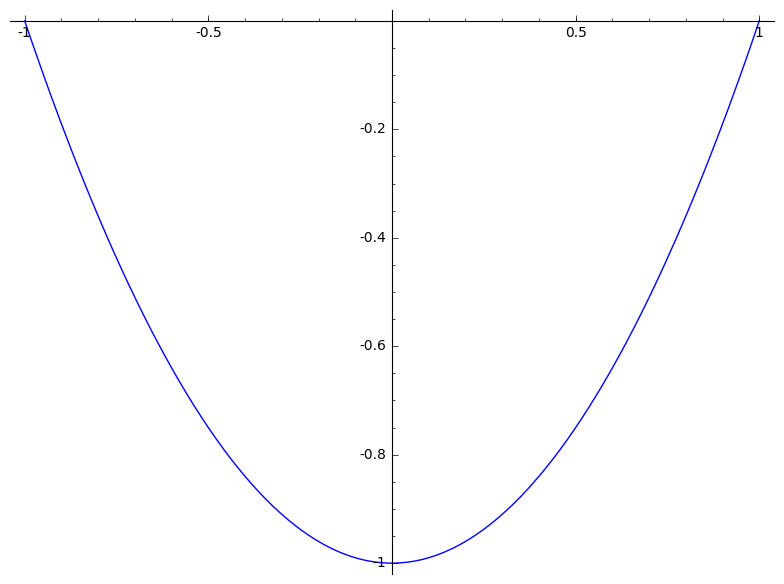

In [1]:
plot(x^2-1)

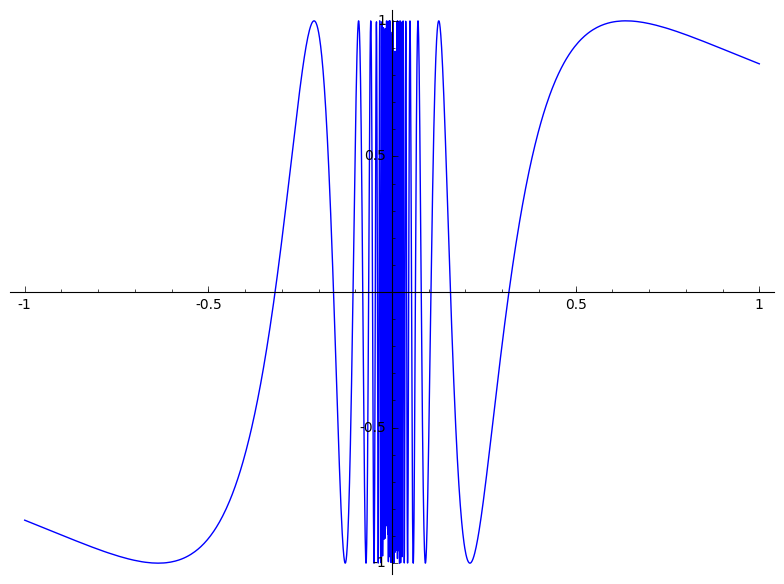

In [1]:
plot(sin(1/x),(x,-1,1))

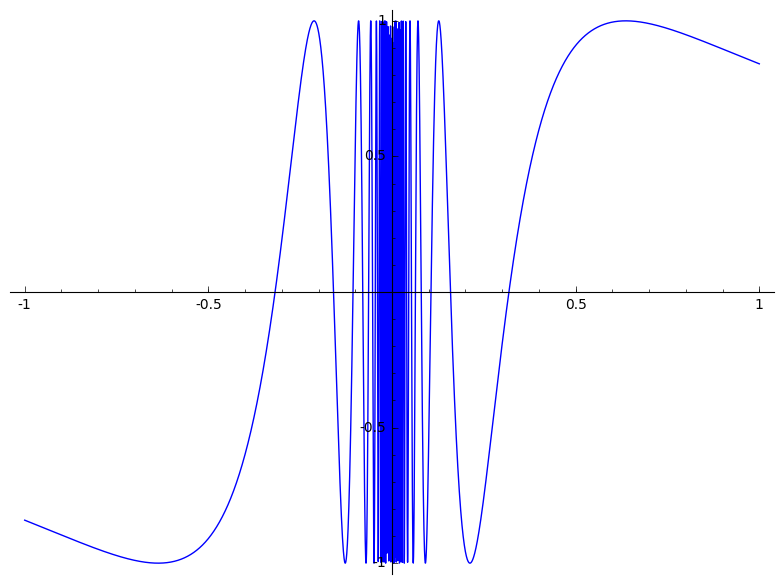

In [1]:
plot(sin(1/x),(x,-1,1),adaptive_recursion=0,plot_points=10000)

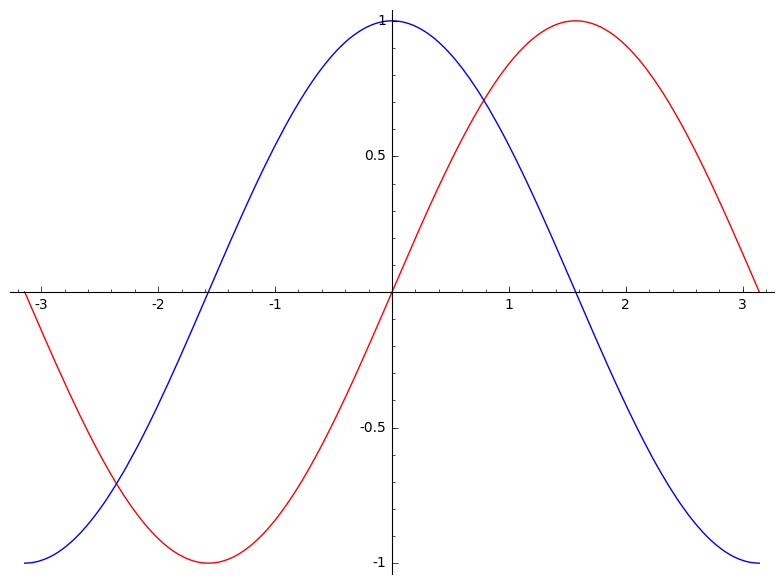

In [1]:
p = plot(sin(x),color='red',xmin=-pi,xmax=pi)
p += plot(cos(x),xmin=-pi,xmax=pi); p.show()

Mittels <em>point() </em> k&ouml;nnen Punkte gezeichnet werden.<br /><br />  

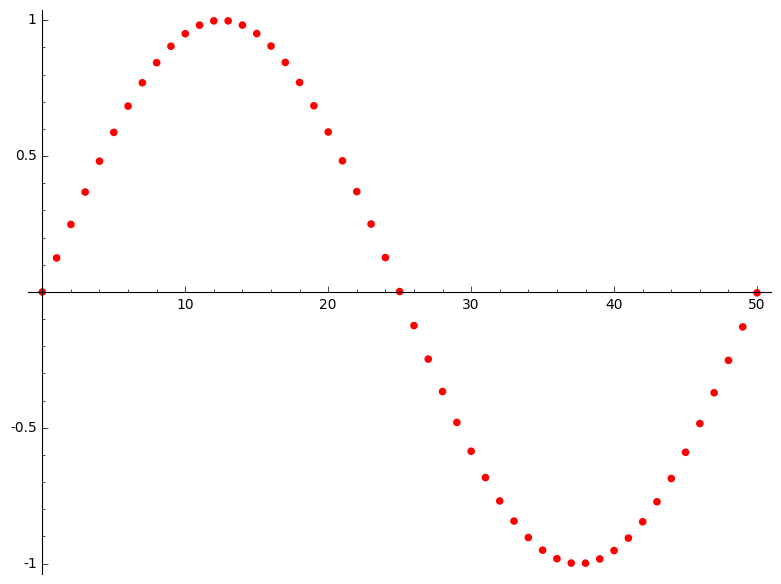

In [1]:
point([(i,sin(i*6.28/50)) for i in [0..50]],color='red', size=30)

In [1]:
point2d.options

{'alpha': 1,
 'aspect_ratio': 'automatic',
 'faceted': False,
 'legend_color': None,
 'legend_label': None,
 'marker': 'o',
 'markeredgecolor': None,
 'rgbcolor': (0, 0, 1),
 'size': 10}

#### 3D (Flächen)
``` python
plot3d_ly(<f>, <(x,a,b)>,<(y,c,d)>, <options>)
```
auf dem Intervall $x \in [a,b]$ bzw. $(x,y) \in [a,b] \times [c,d]$.  


Plot von $f(x,y)=\sin(y^2+x)-\cos(y-x^2)$ auf $[0,\pi]^2$:  

In [1]:
%load_ext autoreload
%autoreload 2
from sageplotly import *

In [1]:
f(x,y) = sin(y^2+x)-cos(y-x^2)
d = plot3d_ly(f, (x,0,pi),(y,0,pi), plot_points= [30, 30])
ishow3d([d])

**density plot** 
$\mathbb{R}^2 \rightarrow \mathbb{R}$ Funktionswert nicht als H&ouml;he sondern als Farbe dargestellt.  


``` python
plotdens_ly(<f>,<(x,a,b)>,<(y,c,d)>,<optionen>)
```

In [1]:
ishow3d([plotdens_ly(f,(x,0,pi),(y,0,pi))],title='Density')

#### Auflösung 
Plot von $g(x,y)=\cos (20 \exp(-x^2-y^2 ))$ auf $[-1,1] \times [-1,1]$  

In [1]:
g(x,y) = cos(20*exp(-x^2-y^2))
ishow3d([plot3d_ly(g,(x,-1,1),(y,-1,1))])

In [1]:
ishow3d([plot3d_ly(g,(x,-1,1),(y,-1,1),plot_points=[100,100])])

In [1]:
ishow3d([plotdens_ly(g,(x,-1,1),(y,-1,1),plot_points=[100,100])])

#### 3D Kugel

```python
sphere_ly(r=0.3, precision=40)
```
* r: Radius
* precision: Anzahl Punkte


In [1]:
S = sphere_ly(r=0.3, precision=40)
ishow3d([S])

### Kombination aus zwei plots

In [1]:
var('x,y')
g(x,y) = sin(pi*(x^2+y^2))/2
W = plot3d_ly(g,(x,-1,1),(y,-1,1), color='yellow', plot_points=[20,20], showscale=False)
S = sphere_ly(r=0.3, precision=40)
ishow3d([W, S])

### Parametrische Darstellung von Funktionen

#### 2D Linie
Parameterdarstellung:
$$\{(x(t),y(t)) \in \mathbb{R}^2 \;|\; t \in [a,b]\}.$$

```python
parametric_plot([<x(t)>, <y(t)>], <(t,a,b)>, <optionen>, ...) 
```

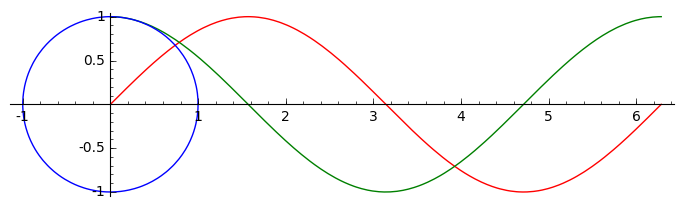

In [1]:
var('t')
f1 = parametric_plot([t,sin(t)],(t,0,2*pi),color='red')
f2 = parametric_plot([t,cos(t)],(t,0,2*pi),color='green')
f3 = parametric_plot([cos(t),sin(t)],(t,0,2*pi))
(f1+f2+f3).show(figsize=7)
(f1+f2+f3).save('parametric2d.pdf')

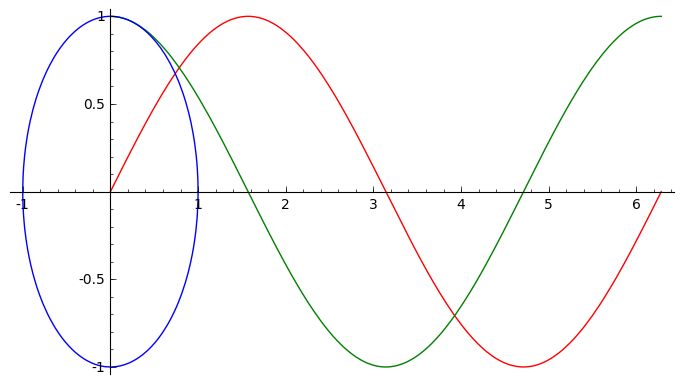

In [1]:
(f1+f2+f3).show(figsize=7,aspect_ratio=2)

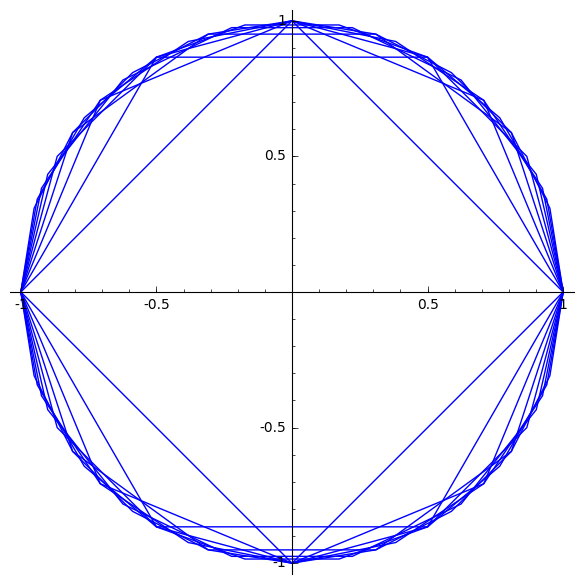

In [1]:
add([parametric_plot([cos(t),sin(t)],(t,0,2*pi),plot_points=2*k+1,randomize=False,adaptive_recursion=0 ) for k in [2..10]])

#### 3D Linie

$$\{(x(t),y(t),z(t)) \in \mathbb{R}^3 \;|\; t \in [a,b] \}.$$

``` python
parametricplotline_ly (<g>, <(t,0,1)>,<optionen>)]
```

In [1]:
var('t')
g = [(1-t*t)*cos(99*t)
     ,(1-t*t)*sin(99*t)
     ,t]
ishow3d([parametricplotline_ly (g, (t,0,1), points= 20)])

In [1]:
ishow3d([parametricplotline_ly(g, (t,0,1),points=300)])

#### 3D - Fläche

$$\{(x(t1,t2),y(t1,t2),z(t1,t2)) \in \mathbb{R}^3 \;|\; t1 \in [a,b], t2 \in [c,d] \}.$$
  
``` python
parametricplot_ly (<[x,y,z]>,<(t1,a,b)>, <(t2,c,d)>, <optionen>)
```

*Beispiel*: Ellipsoid-Oberfl&auml;che
$$ x=r \cos(t_1) \sin(t_2), \ y=2r \sin (t_1) \sin (t_2),\ z =r \cos(t_2) $$
mit $0 \leq t_1 \leq 2 \pi, 0 \leq t_2 \leq \pi.$  
 

In [1]:
var('t1,t2')
r = 1
x = r*cos(t1)*sin(t2)
y = 4*r*sin(t1)*sin(t2)
z = r*cos(t2)
ishow3d([parametricplot_ly ([x,y,z],(t1,0,2*pi), (t2,0,pi/2), points= 30)])

**Farbskalierung und Farbschema**

``` python
colorscale='<colorname>'
```

Liste der [colormaps](http://matplotlib.org/examples/color/colormaps_reference.html)


In [1]:
ishow3d([parametricplot_ly ([x,y,z],(t1,0,2*pi), (t2,0,pi/2), points= 30, colorscale='Viridis')])

### 3D Punkte

``` python
point3d_ly([(x,y,z),...],<optionen>)
```

*optionen*

* size=5 : Größe des Markers




In [1]:
p = point3d_ly([(1,2,3)],size=5)
ishow3d([p])

### Konturen

Zweidimensionale Grafik f&uuml;r $f:\mathbb{R}^2 \rightarrow \mathbb{R}$: <em>Niveaulinien</em> (z.B. H&ouml;henmeter auf einer Landkarte):
$$\{(x,y) \in \mathbb{R}^2 \;|\; f(x,y)=c, c \in \mathbb{R}\}$$  
``` python
plotcontour_ly(<f>, <(x,a,b)>, <(y,c,d)>, contours=dict(start=c1,end=c2,size=c3), <optionen>, ...)
```
Mit der option contours kann man die range und Anzahl der Konturlinien angeben.

*Beispiel*: Zeichnen der Niveaulinien f&uuml;r $-0.5, 0, 0.5$ der Funktion $\sin(4\pi x)y$  

In [1]:
var('x,y')
ishow3d([plotcontour_ly(sin(pi*4*x)*y,(x,-1,1),(y,-1,1),contours=dict(start=-0.5,end=0.5,size=0.1))])

### Animationen
Der Befehl  
``` python
animate([<graph1,graph2,...>], optionen, ... )
```
erstellt Animationen aus 2D plots.  
Ausgew&auml;hlte Optionen: xmin, xmax, ymin, ymax.<br /><br />  

In [1]:
an = animate([plot(a*x^2, (x,-5,5)) for a in srange(-1,1,0.05)],ymin=-10,ymax=10)
an.show(iterations=1)
an.save('animation.gif',show_path=True)

Animation with 40 frames

Animation saved to file /home/jschulz1/teaching/sage.git/lecture/animation.gif.


## Graphen

In [1]:
G = graphs.RandomTree(19)
lay = G.layout()

In [1]:
graph_ly(G)

## Vektorfelder, Ströme

In [1]:
var('x,y')
fig = create_streamline_ly([-1-x^2+2*y, 1+x-y^2], (x, -3, 3), (y, -3, 3))
ishow3d(fig['data'])

/nix/store/i0823h21mg7carm6z0ljsas49j98iq6z-sage-7.5/sage/local/lib/python2.7/site-packages/plotly-2.0.0-py2.7.egg/plotly/tools.py:1418: UserWarning:

plotly.tools.FigureFactory.create_streamline is deprecated. Use plotly.figure_factory.create_streamline

